In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import netCDF4 as nc
import xarray as xr
import datetime as dt
from salishsea_tools import evaltools as et, viz_tools, places
import gsw 
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import matplotlib.dates as mdates
import cmocean as cmo
import scipy.interpolate as sinterp
import math
from scipy import io
import pickle
import cmocean
from salishsea_tools import Keegan_eval_tools as ket
import json
from collections import OrderedDict
from matplotlib.colors import LogNorm
import arrow
import glob
import datetime
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
from matplotlib.dates import HourLocator, MonthLocator, YearLocator

fs=16
mpl.rc('xtick', labelsize=fs)
mpl.rc('ytick', labelsize=fs)
mpl.rc('legend', fontsize=fs)
mpl.rc('axes', titlesize=fs)
mpl.rc('axes', labelsize=fs)
mpl.rc('figure', titlesize=fs)
mpl.rc('font', size=fs)
mpl.rc('font', family='sans-serif', weight='normal', style='normal')

import warnings
#warnings.filterwarnings('ignore')
from IPython.display import Markdown, display

%matplotlib inline

In [2]:
with nc.Dataset('/ocean/ksuchy/MOAD/NEMO-forcing/grid/mesh_mask202108.nc') as mesh:
    tmask=np.copy(mesh.variables['tmask'][0,:,:,:])
    navlat=np.copy(mesh.variables['nav_lat'][:,:])
    navlon=np.copy(mesh.variables['nav_lon'][:,:])

In [3]:
ij,ii=places.PLACES['S3']['NEMO grid ji']

In [4]:
ii

258

In [5]:
yearList = [2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022]

data = 'month-avg.202111'
#year = '2014'
month = '01'
file = 'grid'

for year in yearList:
    files=[glob.glob(f'/results2/SalishSea/{data}/SalishSeaCast_1m_{file}_T_*{year}*{month:02d}01_*{year}*{month:02d}??.nc')[0] for year in yearList for month in range(1,13) ]
    

In [6]:
clim=nc.Dataset('/results2/SalishSea/month-avg.202111/SalishSeaCast_month_climatology_grid_T_20070101_20230831.nc')

In [7]:
clim.variables.keys()

dict_keys(['sossheig', 'votemper', 'vosaline', 'sigma_theta', 'e3t', 'gridY', 'gridX', 'depth', 'month'])

In [8]:
clim['votemper'][:,:,ij,ii]

masked_array(
  data=[[ 6.628413 ,  6.697355 ,  6.810818 ,  6.9282327,  7.0465617,
          7.1642876,  7.277785 ,  7.3851943,  7.487249 ,  7.583836 ,
          7.675284 ,  7.7632346,  7.8457246,  7.9226055,  7.9957256,
          8.065954 ,  8.134358 ,  8.204839 ,  8.280044 ,  8.366982 ,
          8.471848 ,  8.598793 ,  8.739404 ,  8.861336 ,  8.9541   ,
          9.01617  ,  9.097222 ,  9.229144 ,  9.346159 ,  9.429701 ,
          9.472707 ,  9.500526 ,  9.509413 ,  9.512207 ,  0.       ,
          0.       ,  0.       ,  0.       ,  0.       ,  0.       ],
        [ 6.6033187,  6.6319513,  6.6804347,  6.7367625,  6.8007812,
          6.873327 ,  6.951712 ,  7.034535 ,  7.118622 ,  7.2035174,
          7.2872415,  7.3677864,  7.444221 ,  7.517729 ,  7.5881257,
          7.656132 ,  7.722895 ,  7.791048 ,  7.864259 ,  7.9479647,
          8.050879 ,  8.167174 ,  8.281119 ,  8.36602  ,  8.440367 ,
          8.5316105,  8.680559 ,  8.886137 ,  9.094727 ,  9.261641 ,
          9.359892 

In [9]:
## Gathering metadata but still not opening the files
dsfiles = xr.open_mfdataset(
        files,
        #chunks=chunk_size,
        compat="override",
        coords="minimal",
        data_vars="minimal",
        drop_variables=['sossheig','vosaline','sigma_theta','e3t'],
        parallel=True,
        engine='netcdf4'
    )

In [10]:
tt=np.array(dsfiles.time)
mod_depth=np.array(dsfiles.depth)
mod_votemper=(dsfiles.votemper.isel(gridY=ij,gridX=ii))

mod_votemper = (np.array(mod_votemper))
mod_votemper = np.ma.masked_equal(mod_votemper,0).T

In [11]:
start= dt.datetime(2007,1,1)
end=dt.datetime(2022,12,31)

In [12]:
date_range=(start,end)

In [13]:
mod_votemper.min()

5.554608

In [14]:

mod_votemper.max()

21.010721

In [15]:
tt.min()

numpy.datetime64('2007-01-15T12:00:00.000000000')

/ocean/ksuchy/MOAD/tools/SalishSeaTools/salishsea_tools/Keegan_eval_tools.py:816: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.dates.AutoDateLocator'>
  plt.locator_params(axis="x", nbins=20)


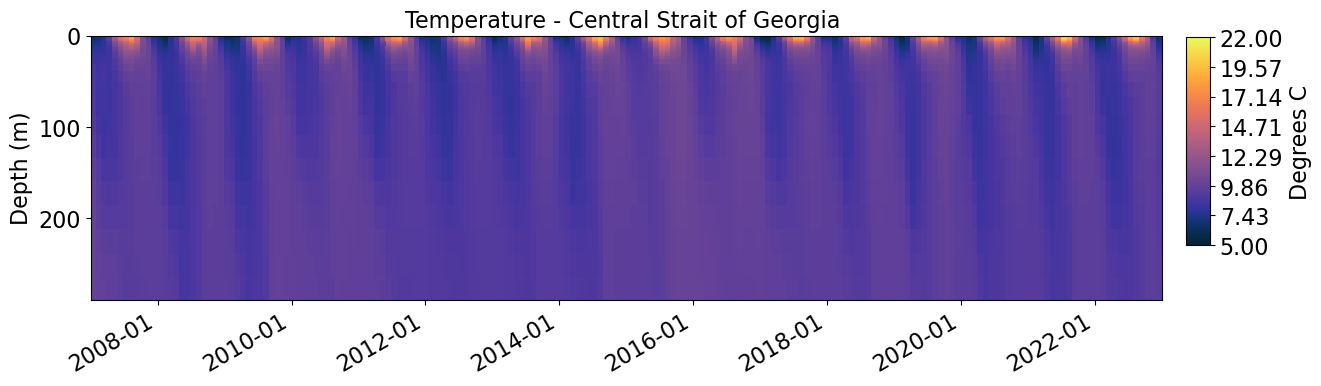

In [16]:

ax=ket.hovmoeller(mod_votemper, mod_depth, tt,(0,290),date_range, title='Temperature - Central Strait of Georgia ',
               var_title='Degrees C',vmax=5,vmin=22,cmap=cmo.cm.thermal)



ax.set_ylabel('Depth (m)')
ax.set_xlabel('')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))



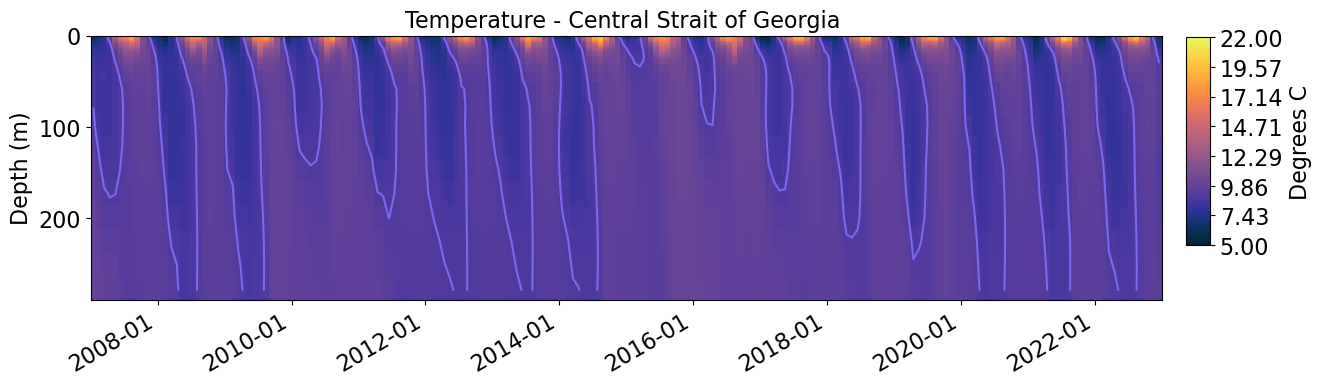

In [17]:
ax=ket.hovmoeller(mod_votemper, mod_depth, tt,(0,290),date_range, title='Temperature - Central Strait of Georgia ',
               var_title='Degrees C',vmax=5,vmin=22,cmap=cmo.cm.thermal)



ax.set_ylabel('Depth (m)')
ax.set_xlabel('')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

contour_value = 9 
contour = ax.contour(tt, mod_depth, mod_votemper, levels=[contour_value], colors='mediumslateblue')

In [18]:
np.shape(mod_votemper)

(40, 192)

In [19]:
np.shape(clim['votemper'][:,:,ij,ii])

(12, 40)

In [20]:
### This isn't pretty, but I could not figure out how to repeat the climatology for all years in the time series
### np.repeat did not repeat on the proper axes

year1=clim['votemper'][:,:,ij,ii].swapaxes(1,0)
year2=clim['votemper'][:,:,ij,ii].swapaxes(1,0)                
year3=clim['votemper'][:,:,ij,ii].swapaxes(1,0)                
year4=clim['votemper'][:,:,ij,ii].swapaxes(1,0)                
year5=clim['votemper'][:,:,ij,ii].swapaxes(1,0)                
year6=clim['votemper'][:,:,ij,ii].swapaxes(1,0)  
year7=clim['votemper'][:,:,ij,ii].swapaxes(1,0)
year8=clim['votemper'][:,:,ij,ii].swapaxes(1,0)
year9=clim['votemper'][:,:,ij,ii].swapaxes(1,0)
year10=clim['votemper'][:,:,ij,ii].swapaxes(1,0)
year11=clim['votemper'][:,:,ij,ii].swapaxes(1,0)
year12=clim['votemper'][:,:,ij,ii].swapaxes(1,0)
year13=clim['votemper'][:,:,ij,ii].swapaxes(1,0)
year14=clim['votemper'][:,:,ij,ii].swapaxes(1,0)
year15=clim['votemper'][:,:,ij,ii].swapaxes(1,0)
year16=clim['votemper'][:,:,ij,ii].swapaxes(1,0)                

In [21]:
## Concatentate all of the above files to get sequential climatologies across the time series
clim_temp=np.concatenate((year1,year2,year3,year4,year5,year6, year7, year8,year9,year10,\
                         year11,year12,year13,year14,year15,year16), axis=1)

In [22]:
np.shape(clim_temp)

(40, 192)

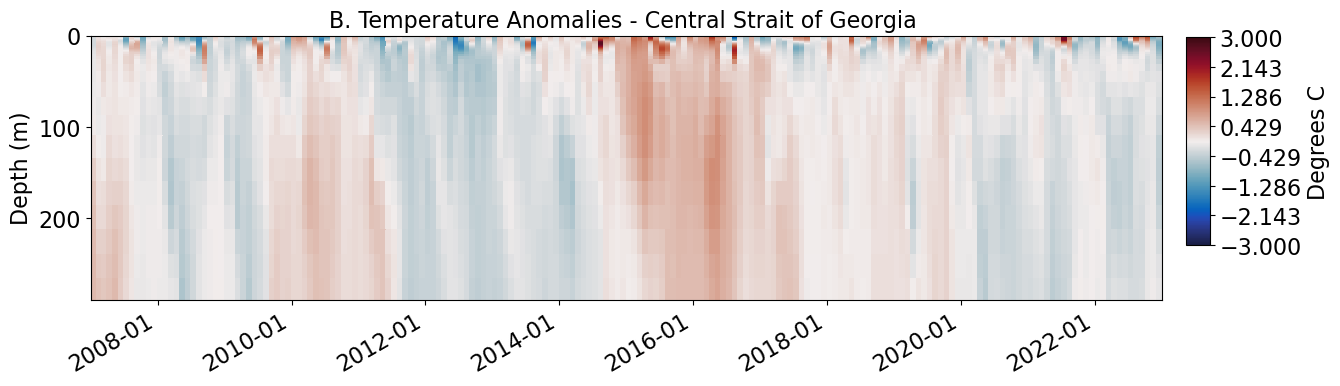

In [23]:
ax=ket.hovmoeller(mod_votemper-clim_temp, mod_depth, tt,(0,290),date_range, title='B. Temperature Anomalies - Central Strait of Georgia ',
               var_title='Degrees C',vmax=-3,vmin=3,cmap=cmo.cm.balance)



ax.set_ylabel('Depth (m)')
ax.set_xlabel('')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))


#contour_value = 9 
#contour = ax.contour(tt, mod_depth, mod_votemper, levels=[contour_value], colors='mediumslateblue')

In [24]:
(mod_votemper-clim_temp).min()

-2.0872574

In [25]:
(mod_votemper-clim_temp).max()

2.7259169

In [26]:
mean_anomalies=np.mean(mod_votemper-clim_temp,axis=0)

In [27]:
mean_anomalies

masked_array(data=[-0.05690327812643612, 0.17875993953031652,
                   0.16623475972343893, 0.06230780657599954,
                   0.21885215534883387, 0.023239696727079505,
                   -0.2597049825331744, 0.24235186857335708,
                   0.1911322088802562, -0.45288899365593405,
                   -0.0010207400602452895, -0.04721693431629854,
                   -0.15998676243950338, -0.3356948179357192,
                   -0.07754724165972542, -0.23897420658784754,
                   -0.33739493874942555, -0.27072640026316924,
                   -0.2731501635383157, -0.7938054028679343,
                   0.2899458548601936, -0.315245039322797,
                   -0.02721898696001838, -0.10500868629006778,
                   -0.28368983549230237, -0.19564331279081457,
                   -0.43215305664960074, -0.37915992736816406,
                   -0.3559810414033778, 0.2974106844733743,
                   0.32266712188720703, -0.05724618014167337,
         

In [28]:
np.shape(mod_votemper)

(40, 192)

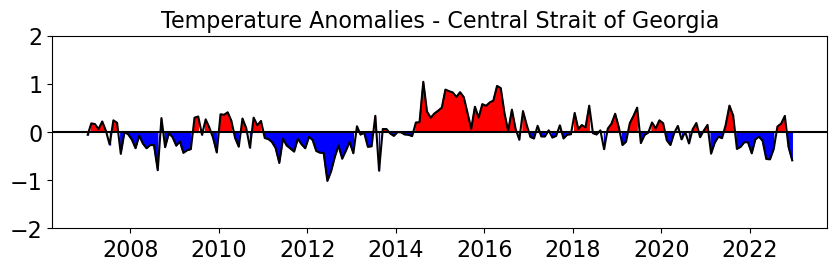

In [29]:
### All depths 

fig,ax=plt.subplots(1,1,figsize=(10,2.5))
x=tt
y=mean_anomalies

ax.plot(x,y,color='k')
ax.set_ylim(-2,2)
ax.axhline(y=0,color='k',linestyle='-')

ax.fill_between(x,y,where=y<0, color='blue')
ax.fill_between(x,y,where=y>0, color='red')

ax.set_title('Temperature Anomalies - Central Strait of Georgia')

plt.show()

In [30]:
mean_anomalies_surf=np.mean(mod_votemper[0:23]-clim_temp[0:23],axis=0) ##20 = 25m depth

In [31]:
np.shape(mean_anomalies_surf)

(192,)

In [32]:
np.shape(tt)

(192,)

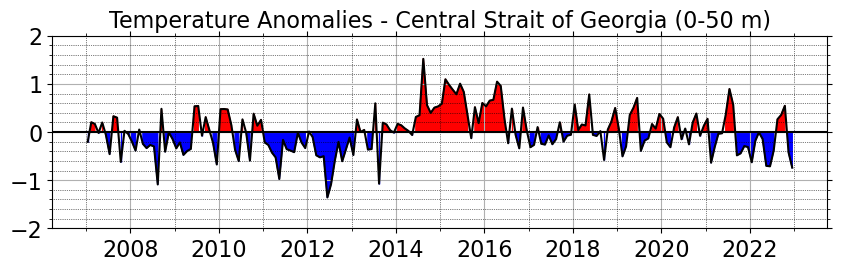

In [33]:
## mean anomalies for surface (0-25m) only

fig,ax=plt.subplots(1,1,figsize=(10,2.5))
x=tt
y=mean_anomalies_surf


ax.plot(x,y,color='k')
ax.set_ylim(-2,2)
plt.grid(True)
ax.minorticks_on()
#plt.grid(which='major',axis ='y', linewidth='1', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
ax.tick_params(which='both', # Options for both major and minor ticks
                top='off', # turn off top ticks
                left='off', # turn off left ticks
                right='off',  # turn off right ticks
                bottom='off') # turn off bottom ticks
hloc = YearLocator(1)
ax.xaxis.set_minor_locator(hloc)

ax.axhline(y=0,color='k',linestyle='-')


ax.fill_between(x,y,where=y<0, color='blue')
ax.fill_between(x,y,where=y>0, color='red')

ax.set_title('Temperature Anomalies - Central Strait of Georgia (0-50 m)')
#plt.grid()
plt.show()

In [34]:
mean_anomalies_below25=np.mean(mod_votemper[23:28]-clim_temp[23:28],axis=0)

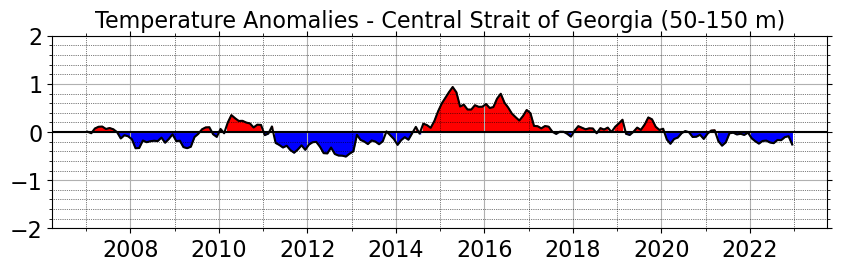

In [35]:
## mean anomalies for 25 m and below (33 is the last depth grid layer at this location)

fig,ax=plt.subplots(1,1,figsize=(10,2.5))
x=tt
y=mean_anomalies_below25

ax.plot(x,y,color='k')
ax.set_ylim(-2,2)
ax.axhline(y=0,color='k',linestyle='-')

ax.fill_between(x,y,where=y<0, color='blue')
ax.fill_between(x,y,where=y>0, color='red')
plt.grid(True)
ax.minorticks_on()
#plt.grid(which='major',axis ='y', linewidth='1', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
ax.tick_params(which='both', # Options for both major and minor ticks
                top='off', # turn off top ticks
                left='off', # turn off left ticks
                right='off',  # turn off right ticks
                bottom='off') # turn off bottom ticks
hloc = YearLocator(1)
ax.xaxis.set_minor_locator(hloc)
ax.set_title('Temperature Anomalies - Central Strait of Georgia (50-150 m)')

plt.show()

In [36]:
mean_anomalies_deep=np.mean(mod_votemper[28:]-clim_temp[28:],axis=0) ##28=150m depth

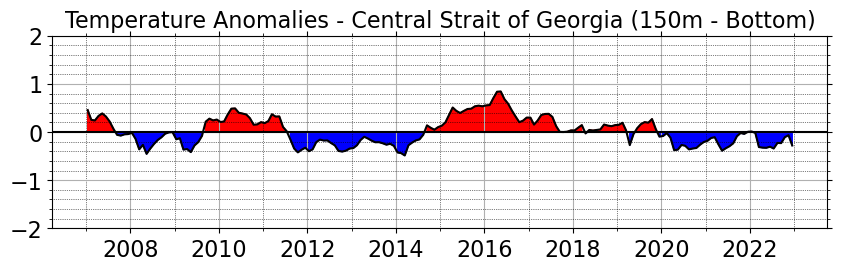

In [37]:
## mean anomalies for 150 m and below (33 is the last depth grid layer at this location)

fig,ax=plt.subplots(1,1,figsize=(10,2.5))
x=tt
y=mean_anomalies_deep

ax.plot(x,y,color='k')
ax.set_ylim(-2,2)
ax.axhline(y=0,color='k',linestyle='-')
plt.grid(True)
ax.minorticks_on()
#plt.grid(which='major',axis ='y', linewidth='1', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
ax.tick_params(which='both', # Options for both major and minor ticks
                top='off', # turn off top ticks
                left='off', # turn off left ticks
                right='off',  # turn off right ticks
                bottom='off') # turn off bottom ticks
hloc = YearLocator(1)
ax.xaxis.set_minor_locator(hloc)
ax.fill_between(x,y,where=y<0, color='blue')
ax.fill_between(x,y,where=y>0, color='red')

ax.set_title('Temperature Anomalies - Central Strait of Georgia (150m - Bottom)')

plt.show()

In [38]:
CentralSoG_WindAnom=np.array([None, 0.2733955125000005, 0.7854867312500007, -0.1551118124999995,
       0.21045851874999943, -0.23161023750000043, 0.3225721687500003,
       -0.04869428124999997, 0.53509624375, 0.4848793437500003,
       -0.03438763125000044, 0.6581116266666669, 0.6472107600000001,
       -0.19617018749999993, 0.24235253125000078, -0.4009125124999997,
       0.5491370187499998, 0.25158056250000005, 0.6698974687499999,
       0.6628719187499996, 0.2651611437500003, 0.20379934375000008,
       0.3750713687499996, -0.09566917333333258, -0.5381470400000001,
       -0.49115308749999986, 0.7104106312500003, 0.2842491875000004,
       0.5253930187499991, 0.1246429624999994, 0.3286884687499998,
       -0.048627581249999885, 0.3033334437500006, 0.7910873437500001,
       1.5256083687499995, -0.9184998733333325, 0.8142837599999995,
       0.23869551249999965, 0.09323653125000053, 1.1068431875,
       0.32416071874999997, -0.02948353749999999, 0.9223031687500005,
       -0.1493001812500001, 0.20349654375000004, 0.2620417437500002,
       0.23377336874999877, 1.4553891266666668, -0.16673994000000025,
       0.9214832125000001, 0.9823556312500008, 0.4915197875000006,
       0.026065318749999733, 0.022909962499999992, -0.23924743124999992,
       0.06203401874999992, 0.16914614374999992, 0.17387264375000022,
       0.8617073687499994, -0.6016715733333324, 1.0995263599999996,
       0.8572545125, 1.3775992312500005, -0.3019118125000002,
       0.6335910187499998, 0.25955396250000007, -0.20763623124999997,
       0.28933111874999984, -0.2707194562499997, 0.2029543437500001,
       0.01497506874999921, 0.8055206266666675, -1.1331308400000002,
       0.044680212500000316, -0.28385876874999916, 0.24499878750000015,
       -0.19118388125000063, -0.15650643750000004, 0.8146041687500003,
       -0.13112128125, 0.17403614375000043, -0.7715953562499998,
       -0.6013560312500008, -0.7363318733333326, -1.0171882400000003,
       0.2757021125000003, 0.17396823125000083, 0.11095518750000011,
       -0.25707278125000066, 0.4892489624999996, -0.03442583124999965,
       -0.0007449812499999986, -0.07389625624999985, 0.26385704374999985,
       -0.4964094312500009, None, -1.2935231400000005,
       -0.8057884875000001, -0.9006007687499995, -0.0066478124999997945,
       -0.4885497812500006, 0.7286293624999995, 0.4831361687500002,
       0.48540411875, 0.5534448437500004, -0.6807116562499997,
       -0.3074459312500011, 1.2480088266666671, -0.23979624000000044,
       -0.3105137874999997, 0.6607372312500006, -0.45595711250000015,
       0.4709246187499998, -0.2287868375000004, 0.3299416687500005,
       0.7947279187499996, -0.15206255624999976, 0.5586339437500003,
       0.38155936874999963, -0.04713587333333269, -0.2882748400000006,
       -0.11937508749999992, 0.16203723125000025, -0.06532021249999964,
       -0.6395814812500005, -0.2763306375000001, -0.6177522312499999,
       -0.6455589812499998, -0.7246195562499995, -0.5850656562500003,
       0.5032533687499994, -1.6466180733333329, 0.3825607599999996,
       -0.5904764875000001, -1.4149052687499992, -0.18554751249999946,
       -0.8274129812500006, -0.3629990375000003, -0.25376433124999975,
       -0.8653279812500001, -0.15861425624999992, -0.8199299562499998,
       -0.8184199312500011, 0.9739905266666673, -0.21715324000000003,
       0.021410512500000145, -1.5931898687499992, 0.5728647875000004,
       0.009679518749999616, -0.19887723750000008, -0.6811443312500001,
       -0.20397298125000018, 0.19196714375000035, -0.09925305625000025,
       -1.372143931250001, -0.6562203733333325, 2.0451837599999996,
       -0.2795724875000003, -0.5189207687499993, -0.5909088124999999,
       -0.23506978125000044, -0.14790703750000045, -0.17904083125000003,
       0.18548881874999967, -0.4386507562499995, -0.08166065624999952,
       0.3039403687499993, -0.039946873333333244, 0.47297955999999974,
       1.1215975125000002, 0.24350723125000062, -0.42869351249999976,
       -0.07122208125000062, 0.060350262500000085, -0.6975132312499999,
       0.05244191875000004, -0.10311415624999976, 0.7386080437500002,
       0.4616023687499995, -0.16547047333333254, -0.5677914400000006,
       -0.9611694874999999, -0.7202157687499993, -0.22041981249999942,
       -0.03931698125000027, -0.3044150375000001, -0.9606188312499997,
       -0.43895158125, -0.47400465624999955, -0.6415174562499999,
       -1.0313281312500004, -0.23345657333333314])

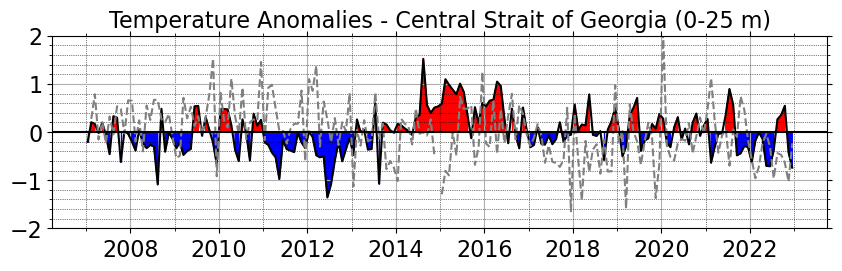

In [39]:
## mean anomalies for surface (0-25m) only

fig,ax=plt.subplots(1,1,figsize=(10,2.5))
x=tt
y=mean_anomalies_surf

ax.plot(x,y,color='k')
ax.plot(x,CentralSoG_WindAnom,color='grey',linestyle='--')
ax.set_ylim(-2,2)
ax.axhline(y=0,color='k',linestyle='-')
plt.grid(True)
ax.minorticks_on()
#plt.grid(which='major',axis ='y', linewidth='1', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
ax.tick_params(which='both', # Options for both major and minor ticks
                top='off', # turn off top ticks
                left='off', # turn off left ticks
                right='off',  # turn off right ticks
                bottom='off') # turn off bottom ticks
hloc = YearLocator(1)
ax.xaxis.set_minor_locator(hloc)
ax.fill_between(x,y,where=y<0, color='blue')
ax.fill_between(x,y,where=y>0, color='red')

ax.set_title('Temperature Anomalies - Central Strait of Georgia (0-25 m)')


plt.show()